### information theory

$p(x)$ - probability distribution

$h(x)$ - 'degree of surprise'

if two events are unrelated, we want:

$p(x,y)=p(x)p(y)$

$h(x,y)=h(x)+h(y)$

therefore a proper formation of $h(x)$ can be

$h(x)=-\log_2 p(x)$

$p(x) \in [0,1]$, $-$ to make $h(x)$ positive

/var/folders/89/wkwstz_d4zq1pshpw71z9wb80000gp/T/ipykernel_53913/4020330595.py:2: RuntimeWarning:

divide by zero encountered in log



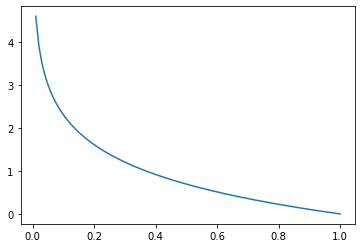

In [115]:
px=np.linspace(0,1,num=100)
plt.plot(px,-np.log(px))

**entropy** of the random variable $x$: the expectation of $h(x)$

$H(x)=-\sum_x p(x)\log_2 p(x)$

"the entropy is a lower bound on the number of bits needed to transmit the state of a random variable"

#### discrete entropy

suppose we have $N$ states of a discrete random variable $X$, where $p(X=x_i)=p_i$, the entropy of $X$ is then

$H[p]=-\sum_i p(x_i)\log p(x_i)$

**sharply peaked $p(x_i)$ has low entropy, whereas those that spread more evenly across many values will have high entropy**

**uniform distribution has high entropy**

when $p(x_i)=1$ and all other $p(x_{!=i})=0$, $H[p]=0$, since $\log 1=0$

if we max the entropy using Lagrange multiplier:

$\tilde{H}=-\sum_i p(x_i)\log p(x_i)+\lambda\left[\sum_i p(x_i)-1 \right]$

we will find $p(x_i)=1/M$ gives the max entropy, where $M$ is the total number of states $x_i$

the corresponding value $H=\log M$

#### continuous entropy

$H(\textbf{x})=-\int p(\textbf{x})\log p(\textbf{x}) d\textbf{x}$

to find the max entropy for continuous entropy, we impose three constraints:

$\int_{-\infty}^{\infty} p(x)dx=1$

$\int_{-\infty}^{\infty} xp(x)dx=\mu$

$\int_{-\infty}^{\infty} (x-\mu)^2p(x)dx=\sigma^2$

the result will be a Gaussian

$p(x)=\frac{1}{(2\pi\sigma^2)^{1/1}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2} \right]$

and 

$H(x)=1/2[1+\log(2\pi\sigma^2)]$

**entropy increases as the distribution becomes broader i.e. as $\sigma^2$ increases**

#### conditional entropy

$H[\textbf{y}|\textbf{x}]=-\iint p(\textbf{y},\textbf{x})\log p(\textbf{y}|\textbf{x})d\textbf{y}d\textbf{x}$

$H[\textbf{x},\textbf{y}]=H[\textbf{y}|\textbf{x}]+H[\textbf{x}]$

**the information needed to describe x and y is given by the sum of the information needed to describe x alone plus the additional information required to specify y given x**

#### relative entropy / Kulback-Leibler divergence

$p(\textbf{x})$ - unknown 

$q(\textbf{x})$ - to model $p(\textbf{x})$

**the additional amount of information required to specify the value of x as a result of using q(x) instead of p(x) is given by**

$
\begin{align}
KL(p||q) &= -\int p(\textbf{x})\log q(\textbf{x})d\textbf{x}-\left(-\int p(\textbf{x})\log p(\textbf{x})d\textbf{x} \right) \\
&= -\int p(\textbf{x}) \log \left[\frac{q(\textbf{x})}{p(\textbf{x})} \right]d\textbf{x}
\end{align}
$

#### properties of KL

- **KL is not a symmetrical quantity**:

$KL(p||q)\neq KL(q||p)$

- **$KL(p||q)\geq 0$ with equality iff $p(\textbf{x})=q(\textbf{x})$**:

apply **Jensen's inequality** to KL with the fact that $-\log x$ is a convex function

$KL(p||q)=-\int p(\textbf{x}) \log \left[\frac{q(\textbf{x})}{p(\textbf{x})} \right]d\textbf{x} \geq -\log \int p(\textbf{x}) \left[\frac{q(\textbf{x})}{p(\textbf{x})} \right]d\textbf{x}=-\log \int q(\textbf{x})d\textbf{x}=0$

since $q(\textbf{x})$ is a probability, $\int q(\textbf{x})d\textbf{x}=1$

Jensen's inequality:

$f\left(\int \textbf{x}p(\textbf{x})d\textbf{x} \right) \leq \int f(\textbf{x})p(\textbf{x})d\textbf{x}$

in this case:

$\textbf{x}=\frac{q(\textbf{x})}{p(\textbf{x})}$, $f(\textbf{x})=\log (\textbf{x})$

$\log \left(\int \frac{q(\textbf{x})}{p(\textbf{x})}p(\textbf{x})d\textbf{x} \right) \leq \int \log \frac{q(\textbf{x})}{p(\textbf{x})} p(\textbf{x})d\textbf{x}$

**we can also interpret the KL divergence as a measure of the dissimilarity of the two distributions p(x) and q(x)**



#### minimizing the KL

suppose data is generated from $p(\textbf{x})$ that we wish to model

the approximator $q(\textbf{x}|\boldsymbol{\theta})$ is parameterized by $\boldsymbol{\theta}$

we can minimize $KL(p(\textbf{x})||q(\textbf{x}|\boldsymbol{\theta}))$ to obain $\boldsymbol{\theta}$

but as usual we don't know $p(\textbf{x})$, we can only observe a finite set of $\{x_i \}_{i=1}^N \sim p(\textbf{x})$ 

by using sampling trick (1.35 prml):

$\mathbb{E}[f]\approxeq 1/N \sum_{n=1}^N f(x_n)$

$KL(p||q) = \sum p(x) \log \frac{p(x)}{q(x)} =\mathbb{E} \left[\log \frac{p(x)}{q(x)}\right]  \approxeq \sum_{n=1}^N [-\log q(x_n|\boldsymbol{\theta})+\log p(x_n)]$

**minimizing KL <=> MLE**

#### mutual information between x and y

consider two sets of variables $\textbf{x}$ and $\textbf{y}$

$p(\textbf{x},\textbf{y})$ - the joint distribution

$p(\textbf{x},\textbf{y})=p(\textbf{x})p(\textbf{y})$ - if two variables are independent

we can measure whether they are close to being independent by measuring the $KL(p(\textbf{x},\textbf{y})||p(\textbf{x})p(\textbf{y}))$

$
\begin{align}
I[\textbf{x},\textbf{y}] &\triangleq KL(p(\textbf{x},\textbf{y})||p(\textbf{x})p(\textbf{y})) \\
&= -\iint p(\textbf{x},\textbf{y})\log \left[\frac{p(\textbf{x})p(\textbf{y})}{p(\textbf{x},\textbf{y})} \right] d\textbf{x} d\textbf{y}
\end{align}
$

we can see that $I[\textbf{x},\textbf{y}]\geq 0$ with equality iff $\textbf{x}$ and $\textbf{y}$ are independent

with the sum and product rules of probability

$I[\textbf{x},\textbf{y}]=H[\textbf{x}]-H[\textbf{x}|\textbf{y}]=H[\textbf{y}]-H[\textbf{y}|\textbf{x}]$

**we can view the mutual information as the reduction in the uncertainty about x by virtue of being told the value of y**

from Bayesian perspective, we can view p(x) as the prior for x and p(x|y) as the posterior

**the mutual information therefore represents the reduction in uncertainty about x as a consequence of the new observation y**

### convex function

**def**: a function is said to be convex if it has the property that every chord lies on or above the function 

any value of $x$ in the interval $x \in [a,b]$ can be written in the form 

$\lambda a+(1-\lambda)b$, where $0\leq\lambda \leq1$

the corresponding point on the chord is:

$\lambda f(a)+(1-\lambda)f(b)$

the corresponding value:

$f(\lambda a+(1-\lambda)b) \leq \lambda f(a)+(1-\lambda)f(b)$

**strictly convex** if the equality is satisfied only for $\lambda=0,1$

#### Jensen's inequality

$f\left(\sum_{i=1} \lambda_i x_i \right) \leq \sum_{i=1} \lambda_i f\left(x_i \right)$

where $\lambda_i \geq 0$ and $\sum_i \lambda_i=1$ for any set of points $x_i$

if we interpret $\lambda_i$ as $p(x_i)$ in discrete case:

$f(\mathbb{E}[x]) \leq \mathbb{E}[f(x)]$

for continuous case:

$f\left(\int \textbf{x}p(\textbf{x})d\textbf{x} \right) \leq \int f(\textbf{x})p(\textbf{x})d\textbf{x}$

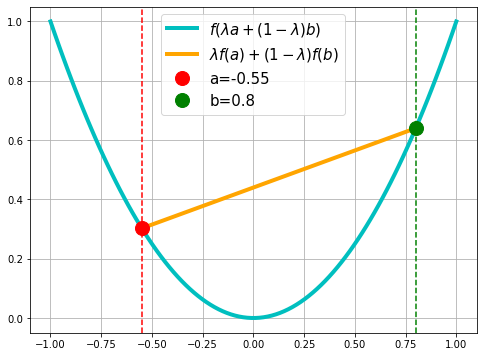

In [116]:
x=np.linspace(-1,1,num=100)
plt.figure(figsize=(8,6))
plt.plot(x,x**2,'c',linewidth=4,label='$f(\lambda a+(1-\lambda)b)$')
a=-0.55
b=0.8

lmd=np.linspace(0,1,num=100)
#lmd*a+(1-lmd)*b
plt.plot(lmd*a+(1-lmd)*b,lmd*a**2+(1-lmd)*b**2,'orange',linewidth=4, label='$\lambda f(a)+(1-\lambda)f(b)$')
plt.axvline(x=a,color='r',linestyle='--')
plt.axvline(x=b,color='g',linestyle='--')
plt.plot(a,a**2,'ro',markersize=14,label='a=-0.55')
plt.plot(b,b**2,'go',markersize=14,label='b=0.8')
plt.grid()
plt.legend(fontsize=15)

/var/folders/89/wkwstz_d4zq1pshpw71z9wb80000gp/T/ipykernel_53913/2673030498.py:2: RuntimeWarning:

invalid value encountered in log



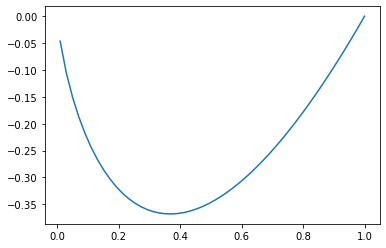

In [118]:
### another convex function
plt.plot(x,x*np.log(x))

continue prml Chapter2 distributions 

### Multinomial Variables

$K=6$ states with $x_3=1$:

$\textbf{x}=(0,0,1,0,0,0)^T$

note such vectors satisfy $\sum_{k=1}^K x_k=1$

therefore

$p(\textbf{x}|\boldsymbol{\mu})=\prod_{k=1}^K \mu_k^{x_k}$, where $\boldsymbol{\mu}=(\mu_1,...,\mu_k)^T$

note $\mu_k \geq 0$ and $\sum_k \mu_k=1$

it's a probability since

$\sum_{\textbf{x}}p(\textbf{x}|\boldsymbol{\mu})=\sum_{k=1}^K \mu_k=1$

and 

$\mathbb{E}[\textbf{x}|\boldsymbol{\mu}]=\sum_{\textbf{x}}p(\textbf{x}|\boldsymbol{\mu})\textbf{x}=(\mu_1,...,\mu_k)^T=\boldsymbol{\mu}$

consider a dataset $\mathcal{D}$ of $N$ independent observations $\textbf{x}_n$

the likelihood function:

$
\begin{align}
p(\mathcal{D}|\boldsymbol{\mu}) &=\prod_{n=1}^N \prod_{k=1}^K \mu_k^{x_{nk}} \\
&= \prod_{k=1}^K \mu_k^{\sum_n x_{nk}} \\
&= \prod_{k=1}^K \mu_k^{m_k}
\end{align}
$

to find MLE solution, we take $\log p(\mathcal{D}|\boldsymbol{\mu})$ w.r.t $\mu_k$ s.t. $\sum_k \mu_k=1$ using Lagrange multiplier $\lambda$ and maximizing:

$\sum_{k=1}^K m_k \log \mu_k + \lambda \left(\sum_{k=1}^K \mu_k -1 \right)$

$\nabla_{\mu_k} \left[\sum_{k=1}^K m_k \log \mu_k + \lambda \left(\sum_{k=1}^K \mu_k -1 \right)\right] =0$

=> $\mu_k=-m_k / \lambda$

since $\sum_k \mu_k=1$

=> $\lambda=-N$

=> $\mu_k^{MLE}=\frac{m_k}{N}$

note $m_k=\sum_n x_{nk}=x_{1k}+x_{2k}+x_{3k}...$ 1,2,3 represents data point 1,2,3

$m_k$ represents the number of observations of $x_k=1$

### Multinomial distribution

consider the joint distribution of the quantities $m_1,...,m_k$ conditioned on $\boldsymbol{\mu}$

**Multinomial distribution** is defined by

$Mult(m_1,m_2,...,m_K|\boldsymbol{\mu},N)=C_{N}^{m_1m_2...m_K}\prod_{k=1}^K \mu_k^{m_k}$

$C_{N}^{m_1m_2...m_K}=\frac{N!}{m_1!m_2!...m_K!}$

$m_k$ - any repeatation of a specific outcome you are looking for



### example of dice

repeat rolling a dice 1,2,3,4,5,6

**roll a die 5 times, what's the probability of two 3s and three 4s (order insensitive)?**

$\frac{5!}{2!3!}$ - number of ways to get two 3s and three 4s

$p(33444|\text{dice probability})=\frac{5!}{2!3!} (1/6)^2(1/6)^3=0.001$

$p(43434|\text{dice probability})=\frac{5!}{2!3!} (1/6)^2(1/6)^3=0.001$

In [21]:
### one example can be dice

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
#throw a dice 20 times
x=np.random.multinomial(n=20,pvals=[1/6]*6)

x

#three times 1, four times 2, zero times 3, three times 4, three times 5, seven times 6

array([3, 4, 0, 3, 3, 7])

In [22]:
np.random.multinomial(100, [1/7.]*5 + [2/7.])

array([10, 12, 14, 15, 17, 32])

<BarContainer object of 6 artists>

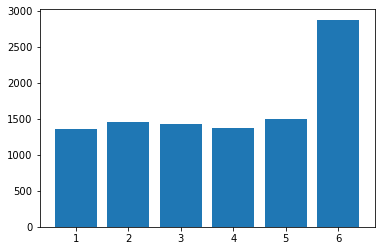

In [31]:
data = np.random.multinomial(10000, [1/7.]*5 + [2/7.])
plt.bar(range(1,7), data)

<BarContainer object of 6 artists>

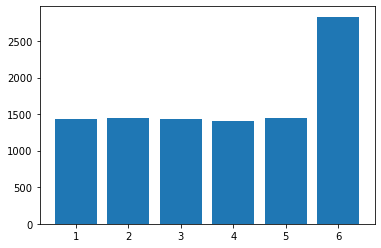

In [32]:
data = np.random.multinomial(100, [1/7.]*5 + [2/7.],size=100)
plt.bar(range(1,7), data.sum(axis=0))

http://www.gentosha-academy.com/serial/okamoto-4/

### categorical distribution

$p(x=k)=p_k$

$\sum_k^K p_k=1$

In [37]:
v = np.random.choice([1,2,3,4,5,6], p = [1/6]*6, size = 10)
v

array([1, 1, 1, 2, 3, 3, 2, 4, 2, 3])

In [39]:
v = np.random.choice(['A', 'B'], p = [2/3, 1/3], size = 10)
v

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B'], dtype='<U1')

(array([1632., 1684., 1692., 1646., 1681., 1665.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

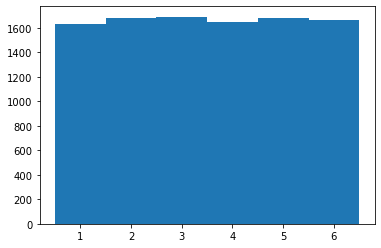

In [41]:
data = np.random.choice([1,2,3,4,5,6], p = [1/6]*6, size = 10000)
idx = [1,2,3,4,5,6]
plt.hist(data, bins = [0.5 + v for v in range(7)])

### Dirichlet distribution

conjugate prior for $\mu_k$ of multinomial distribution

$p(\boldsymbol{\mu}|\boldsymbol{\alpha}) \propto \prod_{k=1}^K \mu_k^{\alpha_k -1}$

where $0 \leq \mu_k \leq 1$ and $\sum_k \mu_k=1$

$\boldsymbol{\alpha}=(\alpha_1,...,\alpha_K)^T$ - parameters of the distribution

the normalized form is **Dirichlet distribution**:

$Dir(\boldsymbol{\mu}|\boldsymbol{\alpha})=\frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)...\Gamma(\alpha_K)}\prod_{k=1}^K \mu_k^{\alpha_k -1}$

where $\alpha_0=\sum_{k=1}^{K} \alpha_k$

**the Dirichlet distribution over three variables $\mu_1,\mu_2,\mu_3$** is confined to a **simplex** as a consequence of the constraints $0\leq \mu_k \leq 1$ and $\sum_k \mu_k=1$ 

**simplex**: a bounded linear manifold

https://plotly.com/python/ternary-plots/

the **posterior** for the parameters $\mu_k$:

$
\begin{align}
p(\boldsymbol{\mu}|\mathcal{D},\boldsymbol{\alpha}) &\propto p(\mathcal{D}|\boldsymbol{\mu})p(\boldsymbol{\mu}|\boldsymbol{\alpha}) \\
&\propto  Mult(m_1,m_2,...,m_K|\boldsymbol{\mu},N)Dir(\boldsymbol{\mu}|\boldsymbol{\alpha})\\
&= \prod_{k=1}^K \mu_k^{\alpha_k+m_k-1} \\
&\rightarrow Dir(\boldsymbol{\mu}|\mathcal{D},\boldsymbol{\alpha}+\textbf{m}) \\
&\rightarrow \frac{\Gamma(\alpha_0+N)}{\Gamma(\alpha_1+m_1)...\Gamma(\alpha_K+m_k)}\prod_{k=1}^K \mu_k^{\alpha_k+m_k-1}
\end{align}
$

where

$p(\mathcal{D}|\boldsymbol{\mu})=Mult(m_1,m_2,...,m_K|\boldsymbol{\mu},N)$ - likelihood

$p(\boldsymbol{\mu}|\boldsymbol{\alpha})=Dir(\boldsymbol{\mu}|\boldsymbol{\alpha})$ - prior

where $\textbf{m}=(m_1,...,m_K)^T$

$\alpha_k$ can be interpreted as an effective number of observations of $x_k=1$

In [43]:
!pip install plotly

     |████████████████████████████████| 15.2 MB 3.0 MB/s            
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


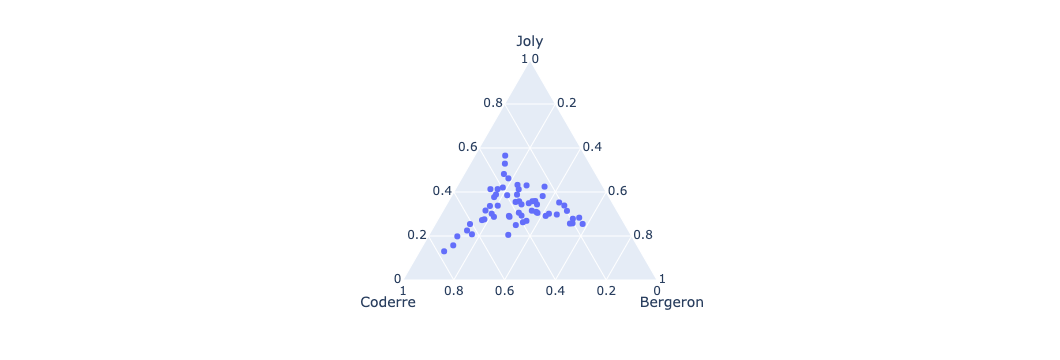

In [51]:
import plotly.express as px
import pandas as pd

df = px.data.election()
fig = px.scatter_ternary(df, a="Joly", b="Coderre", c="Bergeron")
fig.show()

In [49]:
df.head()

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112


In [64]:
simplex=pd.DataFrame()

simplex['mu_1']=np.random.rand(100)/3
simplex['mu_2']=np.random.rand(100)/3
simplex['mu_3']=1-simplex['mu_1']-simplex['mu_2']

In [65]:
simplex.head()

,mu_1,mu_2,mu_3
0,0.222720,0.212618,0.564662
1,0.281159,0.263018,0.455823
2,0.062843,0.113012,0.824146
3,0.209967,0.291454,0.498579
4,0.195318,0.297910,0.506773


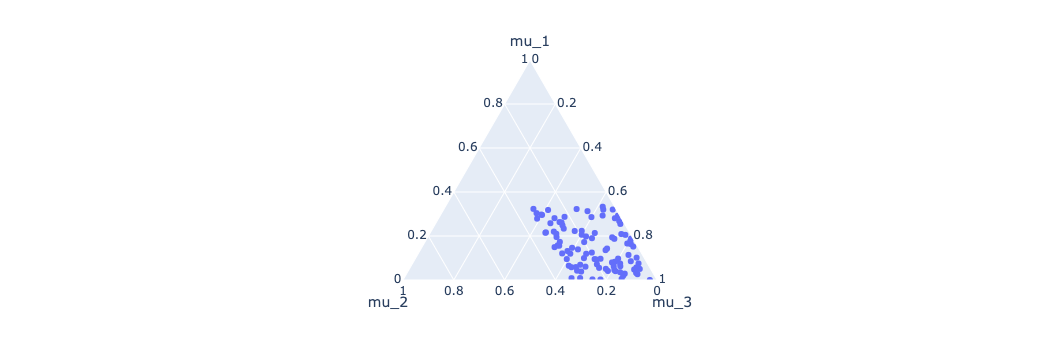

In [66]:
fig = px.scatter_ternary(simplex, a="mu_1", b="mu_2", c="mu_3")
fig.show()

In [63]:
simplex.sum(axis=1)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64

<BarContainer object of 20 artists>

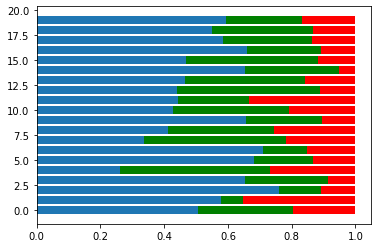

In [67]:
s = np.random.dirichlet((10, 5, 3), 20).transpose()
plt.barh(range(20), s[0])
plt.barh(range(20), s[1], left=s[0], color='g')
plt.barh(range(20), s[2], left=s[0]+s[1], color='r')

In [68]:
np.random.dirichlet((10, 5, 3), 20)

array([[0.48592396, 0.45970012, 0.05437592],
       [0.65353972, 0.2561255 , 0.09033477],
       [0.61489377, 0.34735396, 0.03775228],
       [0.58650789, 0.3393107 , 0.07418141],
       [0.58368857, 0.34192828, 0.07438315],
       [0.38239745, 0.24871808, 0.36888447],
       [0.87690714, 0.045135  , 0.07795787],
       [0.68716882, 0.17510327, 0.13772791],
       [0.44149063, 0.3533483 , 0.20516107],
       [0.78529636, 0.20088779, 0.01381585],
       [0.28833491, 0.40061175, 0.31105334],
       [0.49935151, 0.35468668, 0.14596181],
       [0.49502546, 0.34066305, 0.16431149],
       [0.49072673, 0.30529658, 0.20397669],
       [0.55903552, 0.34490253, 0.09606195],
       [0.39167989, 0.22924203, 0.37907809],
       [0.49839277, 0.13785564, 0.3637516 ],
       [0.72260672, 0.12834519, 0.14904809],
       [0.39192848, 0.29171693, 0.31635458],
       [0.54991399, 0.21103275, 0.23905326]])

In [72]:
dirich=np.random.dirichlet((10, 5, 3))

dirich

array([0.49605439, 0.38316409, 0.12078152])

In [73]:
dirich.sum()

1.0

<BarContainer object of 20 artists>

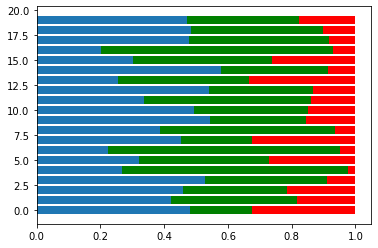

In [207]:
s = np.random.dirichlet((5, 5, 2), 20).transpose()
plt.barh(range(20), s[0])
plt.barh(range(20), s[1], left=s[0], color='g')
plt.barh(range(20), s[2], left=s[0]+s[1], color='r')

<BarContainer object of 20 artists>

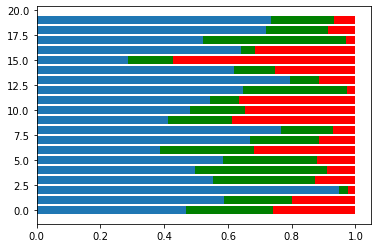

In [75]:
s = np.random.dirichlet((5, 2, 2), 20).transpose()
plt.barh(range(20), s[0])
plt.barh(range(20), s[1], left=s[0], color='g')
plt.barh(range(20), s[2], left=s[0]+s[1], color='r')

### Gaussian distribution

1. the distribution that maximizes the entropy is the Gaussian (Multivariate too)

2. subject to certain mild conditions, the sum of a set of random variables, which is of course itself a random variable, has a distribution that becomes increasingly Gaussian as the number of terms in the sum increases (Central limit theorem)

e.g. binomial distribution will tend to a Gaussian as $N \rightarrow \infty$

(array([1.000e+00, 2.000e+00, 6.000e+00, 3.100e+01, 7.200e+01, 1.780e+02,
        3.800e+02, 6.500e+02, 9.640e+02, 1.337e+03, 1.550e+03, 1.386e+03,
        1.285e+03, 9.660e+02, 6.310e+02, 3.340e+02, 1.460e+02, 5.800e+01,
        1.800e+01, 5.000e+00]),
 array([-0.62135118, -0.61022787, -0.59910457, -0.58798127, -0.57685797,
        -0.56573466, -0.55461136, -0.54348806, -0.53236476, -0.52124145,
        -0.51011815, -0.49899485, -0.48787155, -0.47674825, -0.46562494,
        -0.45450164, -0.44337834, -0.43225504, -0.42113173, -0.41000843,
        -0.39888513]),
 <BarContainer object of 20 artists>)

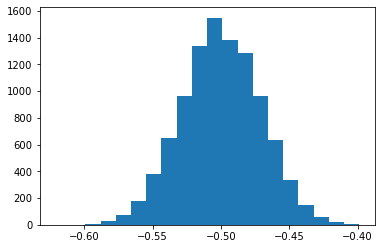

In [137]:
x=np.random.uniform(-1,0,(10000,100))
plt.hist(x.mean(axis=1),bins=20)

CS229 Lecture Notes

### exponential family

**linear regression**: $y|x;\theta \sim \mathcal{N}(\mu,\sigma^2)$

**logistic regression**: $y|x;\theta \sim \text{Bernoulli}(\mu)$

**exponential family**:

$p(y;\eta)=b(y)\exp(\eta^T T(y)-a(\eta))$

$\eta$ - natural parameter

$T(y)$ - sufficient statistic

$a(\eta)$ - log partition, $\exp[-a(\eta)]$ for normalization

**example of Bernoulli**:

$
\begin{align}
Ber(y;\mu)&=\mu^y(1-\mu)^{1-y} \\
&= \exp \left[y \log \frac{\mu}{1-\mu}+\log(1-\mu)  \right] \\
\end{align}
$

$\eta=\log \frac{\mu}{1-\mu} => \mu=\frac{1}{1+\exp^{-\mu}}$ 

$T(y)=y$

$b(y)=1$

$a(\eta)=-\log(1-\mu)=\log(1+\exp \eta)$

**example of Gaussian** with fixed $\sigma$:

$
\begin{align}
\mathcal{N}(y;\mu)&=\frac{1}{\sqrt{2\pi}} \exp \left[-\frac{1}{2}(y-\mu)^2 \right] \\
&= \frac{1}{\sqrt{2\pi}} \exp \left(-\frac{1}{2}y^2 \right) \exp \left(\mu y - \frac{1}{2} \mu^2 \right) \\
\end{align}
$

$\eta=\mu$

$T(y)=y$

$b(y)=(1/\sqrt{2\pi}) \exp(-y^2/2)$

$a(\eta)=\mu^2/2=\eta^2/2$

**Generalized Linear Models (GLMs)**

### three ways to do classification

1. use discriminant function that directly assigns each data $\textbf{x}$ to a specific class

2. model $p(C_k|\textbf{x})$

2.1 **directly** by representing them as parametric models and then optimizing the parameters using some data

2.2 model $p(\textbf{x}|C_k)$, and together with a prior $p(C_k)$ to compute the posterior $p(C_k|\textbf{x})$ by Baye's Theorem

### problem setup

in linear case, we have 

$h(\textbf{w})=\textbf{w}^T\textbf{x}$

in classification case, we use

$h(\textbf{w})=g(\textbf{w}^T\textbf{x})$

where $g(\cdot)$ is a nonlinear **activation function**, the above model can also be called **generalized linear models**

### gradient derivation of softmax regression (multiclass logistic regression)

hypothesis function

$h_k(\boldsymbol{\theta})=g(\boldsymbol{\theta}_k^T X)$

activation function

$g(z_k)=\frac{\exp z_k}{\sum_{l=1}^K \exp{z_l}}$

objective function

$J(\boldsymbol{\theta})=-\frac{1}{N}\sum_{i=1}^N \sum_{l=1}^K y_l^{(i)} \log h_l(\boldsymbol{\theta})^{(i)}$

omit $(i)$, $-\frac{1}{N}$, take single $\theta$

$
\begin{align}
\nabla_{\theta} J(\theta) &= \nabla_{\theta} \sum_{i=1}^N \sum_{l=1}^K y_l \log h_l(\theta)  \\
&= \sum_{i=1}^N \sum_{l=1}^K y_l \frac{\nabla_{\theta} h_l(\theta)}{h_l(\theta)} \\
&= \sum_{i=1}^N \sum_{l=1}^K \frac{y_l}{h_l(\theta)} \nabla_{\theta} h_l(\theta) \\
&= \sum_{i=1}^N \sum_{l=1}^K \frac{y_l}{h_l(\theta)} \nabla_{\theta} \frac{\exp(\theta^TX)}{\sum^K \exp(\theta^TX)} \\
&= \sum_{i=1}^N \sum_{l=1}^K \frac{y_l}{h_l(\theta)} \frac{\sum^K \exp(\theta^TX) \nabla_{\theta} \exp(\theta^TX)-\exp(\theta^TX)\nabla_{\theta}\sum^K \exp(\theta^TX)}{\left[\sum^K \exp(\theta^TX) \right]^2}\\
&= \sum_{i=1}^N \sum_{l=1}^K y_l \frac{\sum^K \exp(\theta^TX)}{\exp(\theta^TX)} \frac{\sum^K \exp(\theta^TX) \nabla_{\theta} \exp(\theta^TX)-\exp(\theta^TX)\nabla_{\theta}\sum^K \exp(\theta^TX)}{\left[\sum^K \exp(\theta^TX) \right]^2}\\
&= \sum_{i=1}^N \sum_{l=1}^K y_l \left[\frac{\nabla_{\theta} \exp(\theta^TX)}{ \exp(\theta^TX) } - \frac{\nabla_{\theta}\sum^K \exp(\theta^TX)}{\sum^K \exp(\theta^TX)}\right] \\
&=\sum_{i=1}^N \sum_{l=1}^K y_l \left[X-\frac{\exp(\theta_k^TX)}{\sum^K \exp(\theta^TX)}\cdot X \right] \\
&= \sum_{i=1}^N \sum_{l=1}^K [y_l-h_l(\theta)]X \\
&= \textbf{X} [Y-\textbf{h}(\boldsymbol{\theta})]^T
\end{align}
$
